# Kidney Stone Prediction using DecisionTree vs RandomForest vs LogisticRegression

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)


In [2]:
df = pd.read_csv('kidney-stone-dataset.csv')
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


# Exploratory Data Analysis

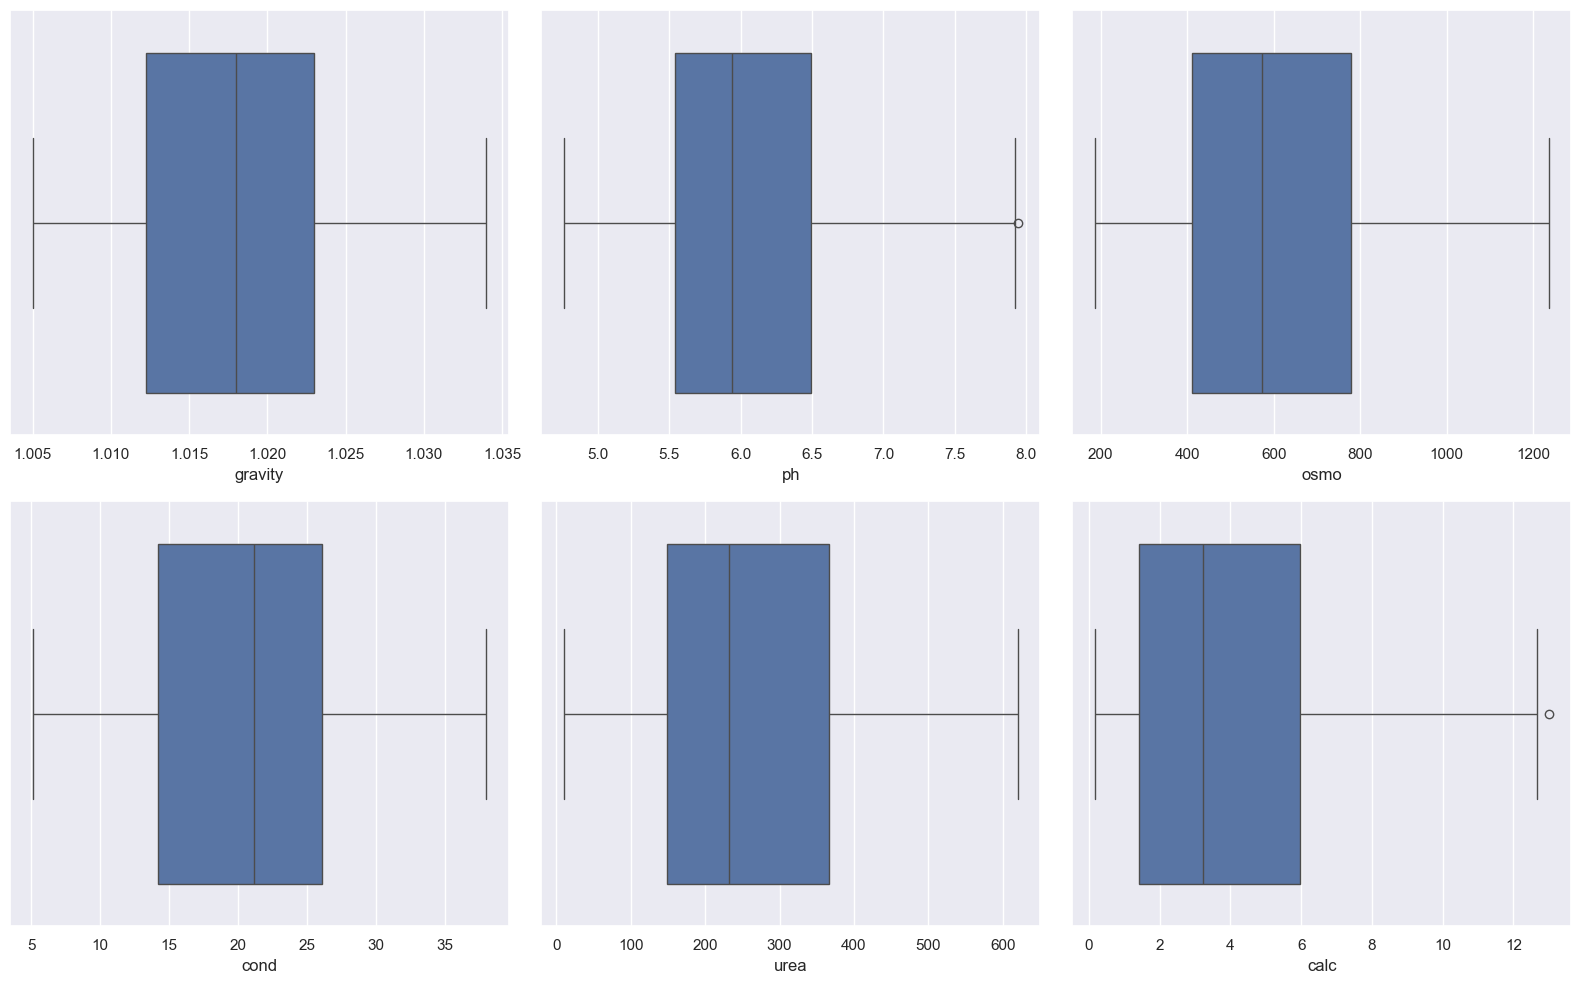

In [6]:
num_vars = ['gravity', 'ph', 'osmo','cond','urea','calc']

fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(16,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=df, ax=axs[i])

fig.tight_layout()
plt.show()

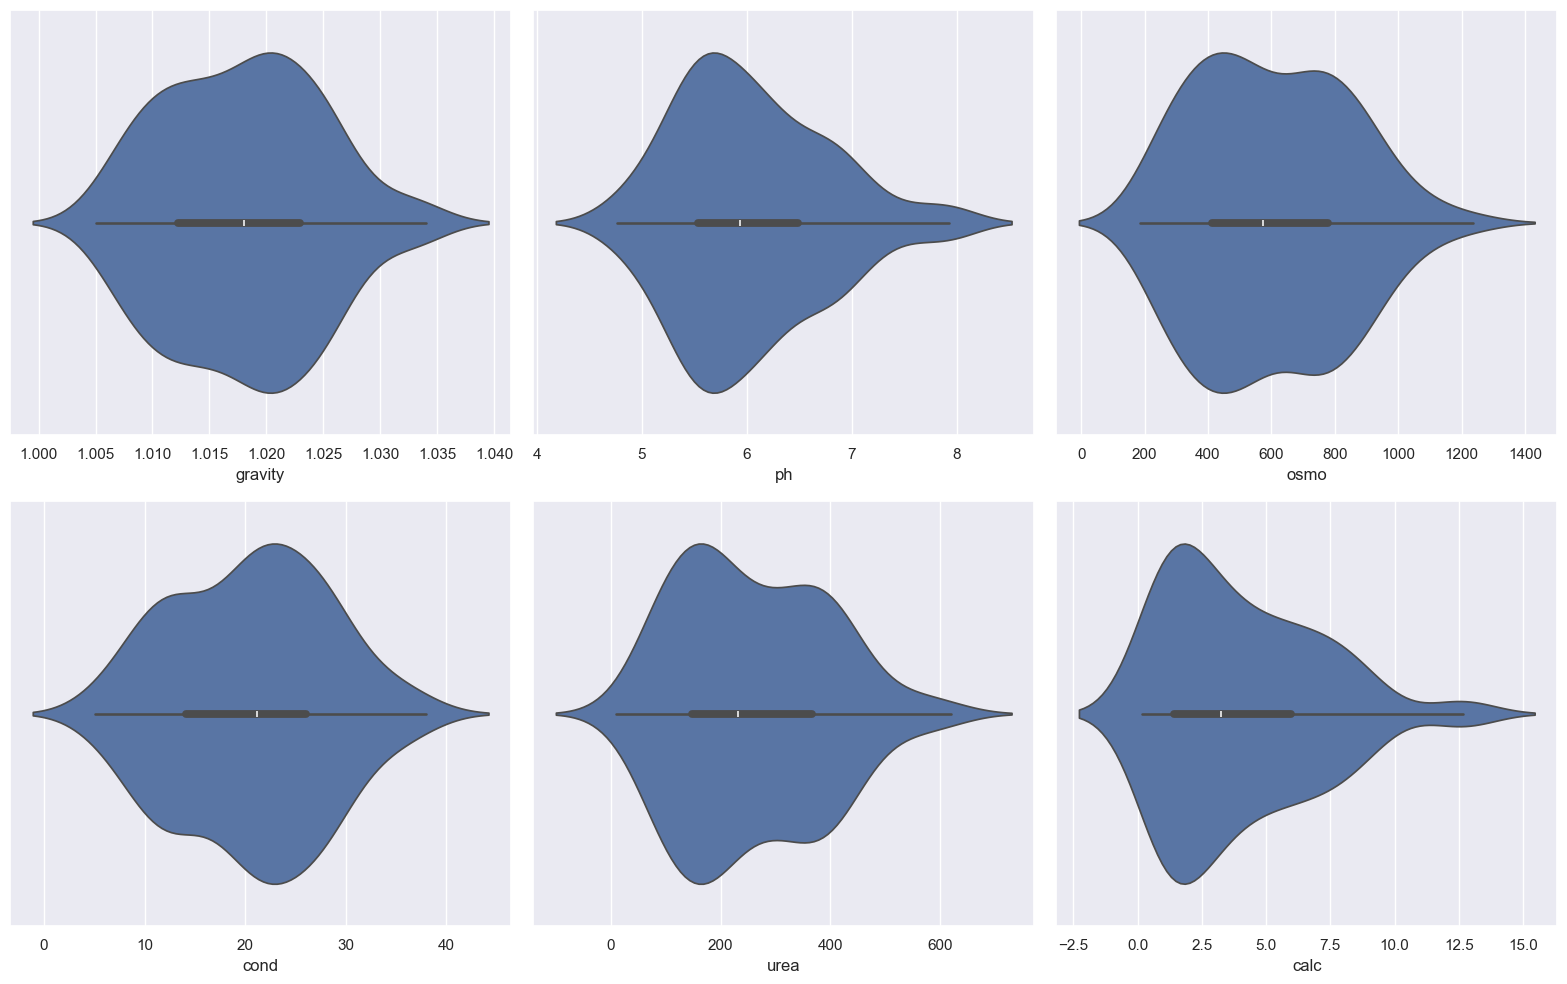

In [8]:
num_vars = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

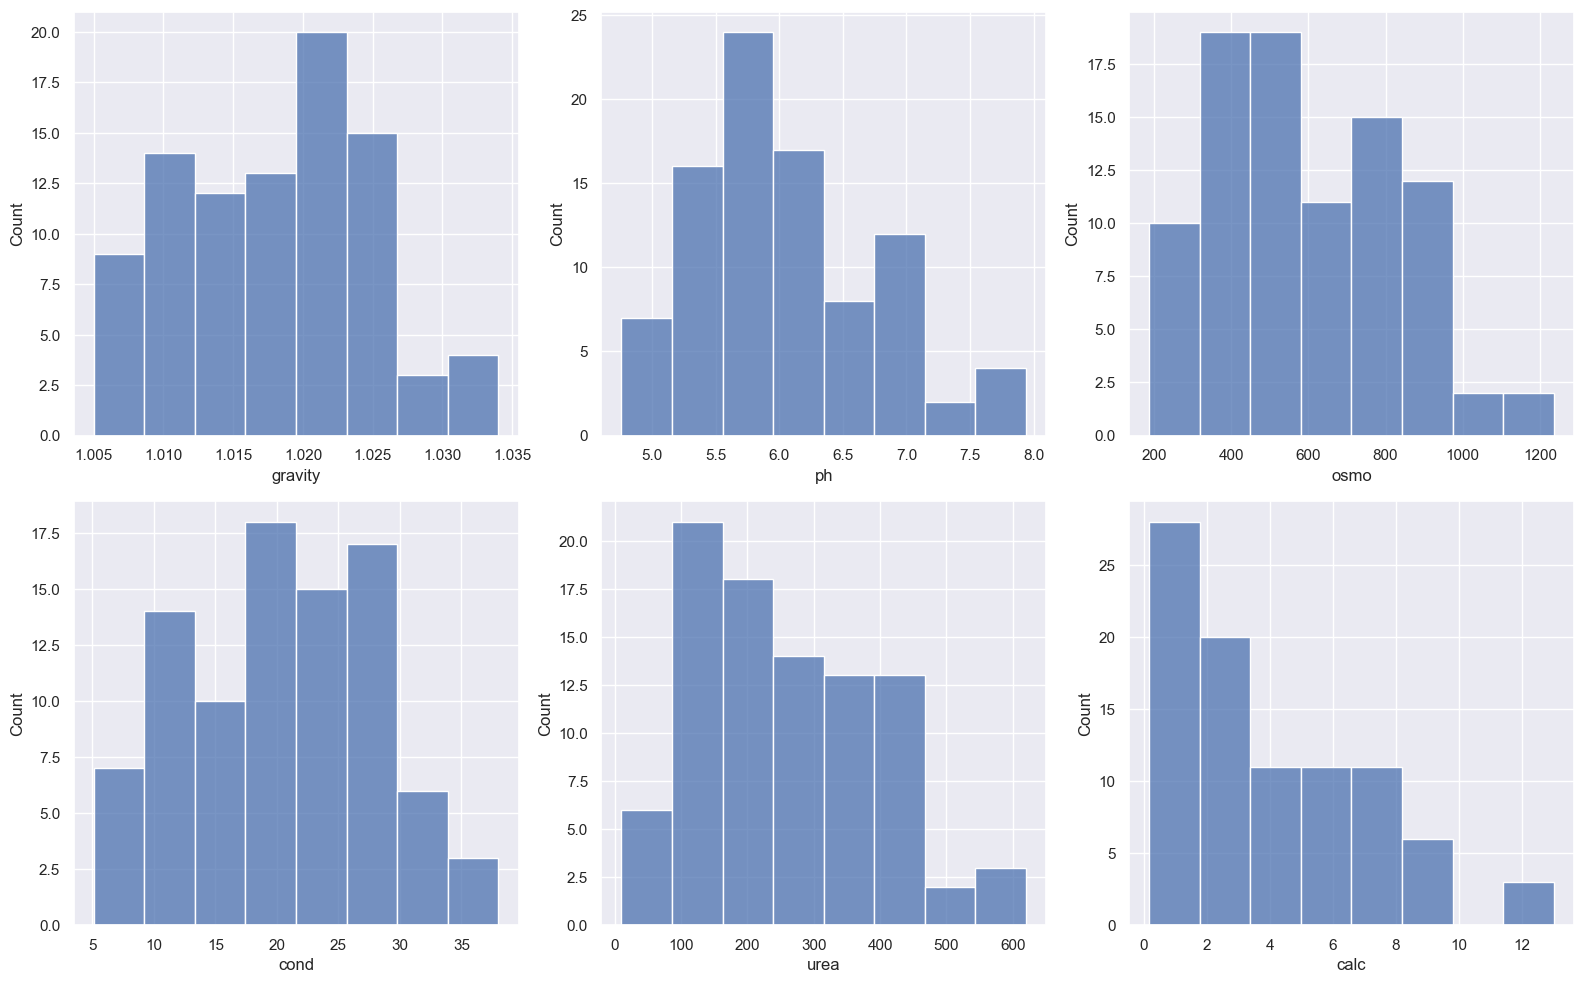

In [9]:
num_vars = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

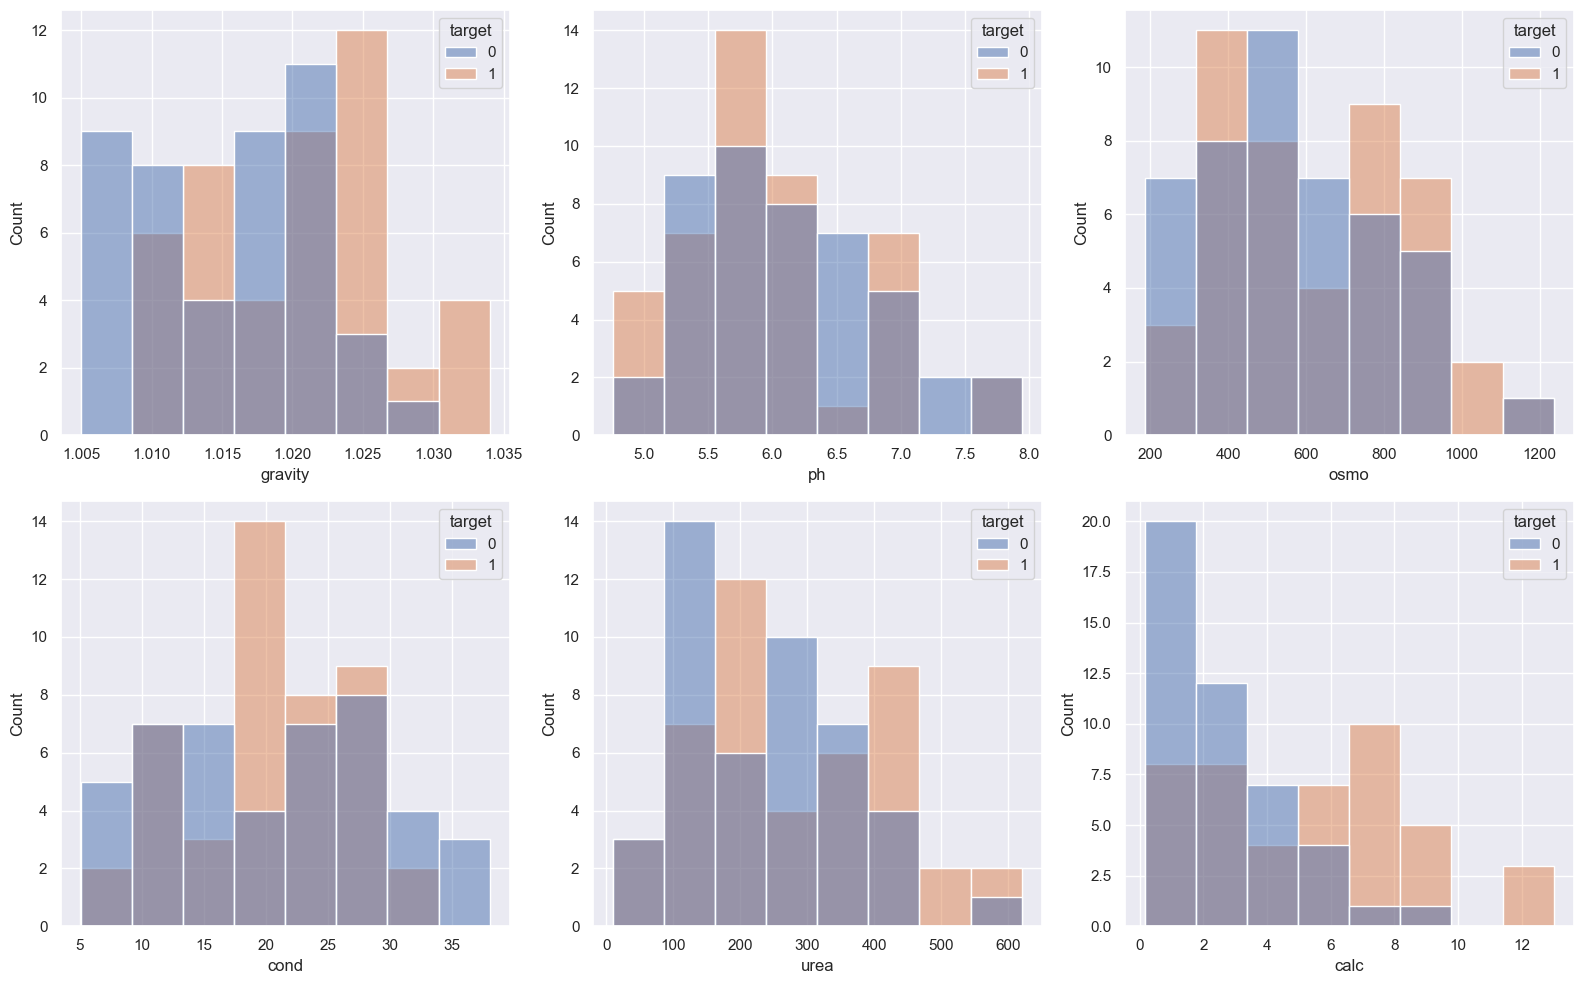

In [10]:
num_vars = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, hue='target', ax=axs[i])

fig.tight_layout()
plt.show()

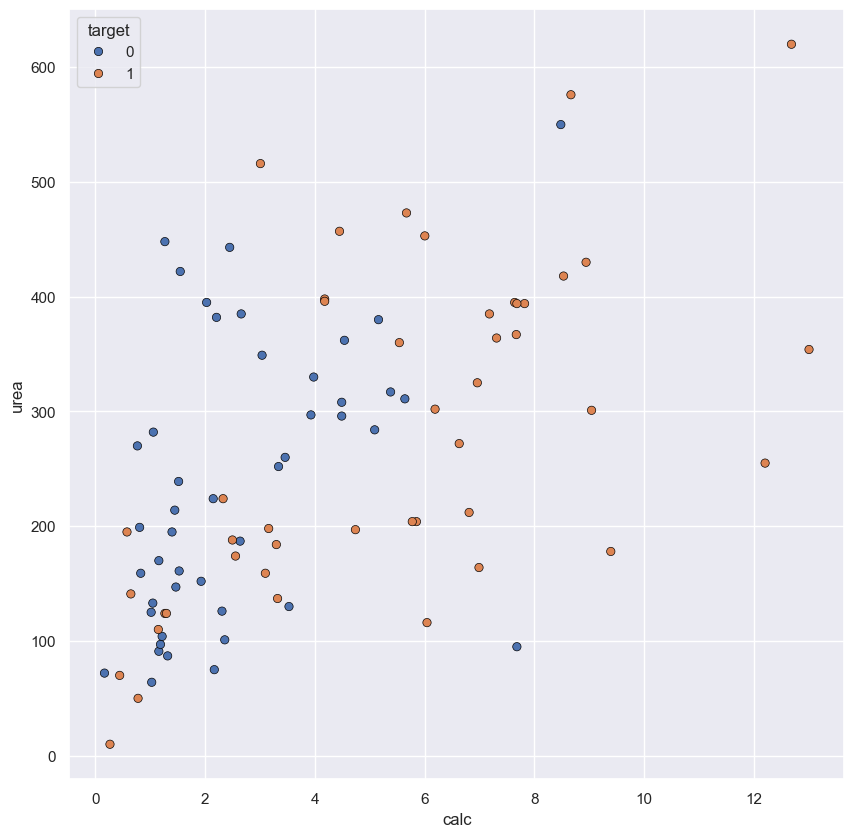

In [12]:
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x='calc', y='urea', hue='target', data=df, edgecolor='black')
plt.show()

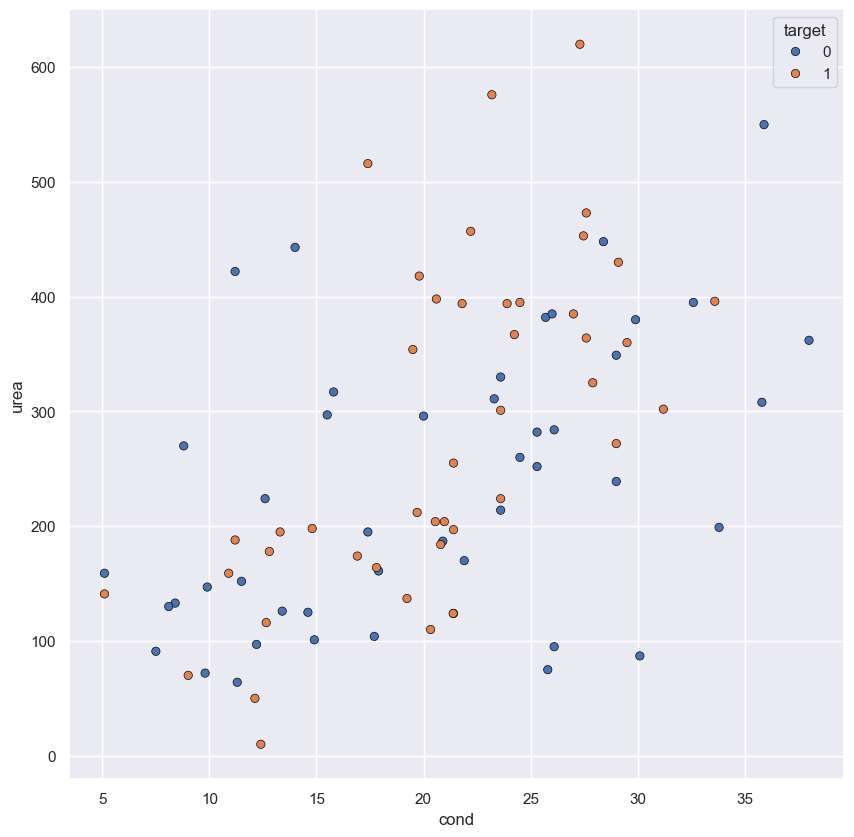

In [13]:
plt.figure(figsize=(10,10),dpi=100)
sns.scatterplot(x="cond", y="urea", hue="target", data=df, edgecolor="black")
plt.show()

# Data Preprocessing

In [16]:
# check the missing value
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing

gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64

In [17]:
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# check the target balance

target
0    45
1    45
Name: count, dtype: int64

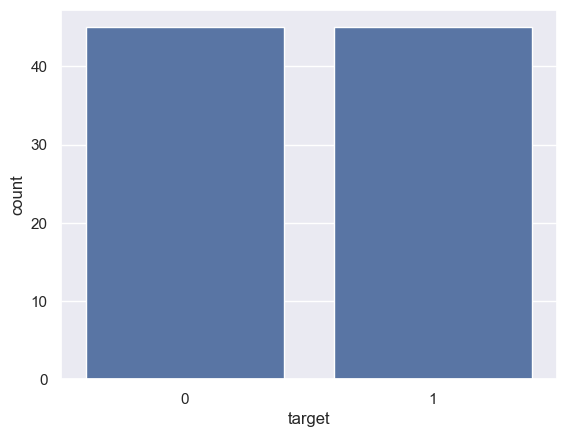

In [20]:
sns.countplot(x=df['target'])
df['target'].value_counts()

<Axes: >

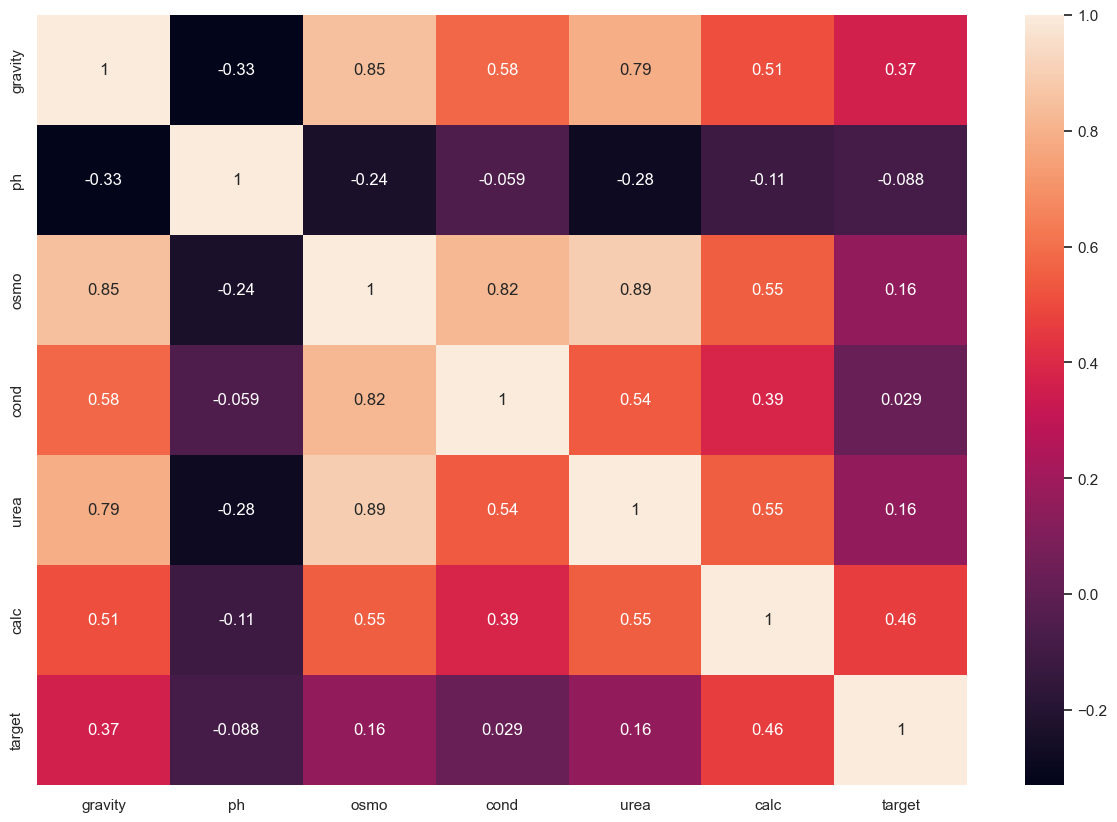

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
# test size= 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# Machine Learning model

# 1. Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4]
}

# perform a grid search with cross validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8,min_samples_leaf=1, min_samples_split=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=3, random_state=0)

In [28]:
y_pred = dtree.predict(X_test)

In [29]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[9 2]
 [4 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.65      0.62      0.62        18
weighted avg       0.66      0.67      0.65        18



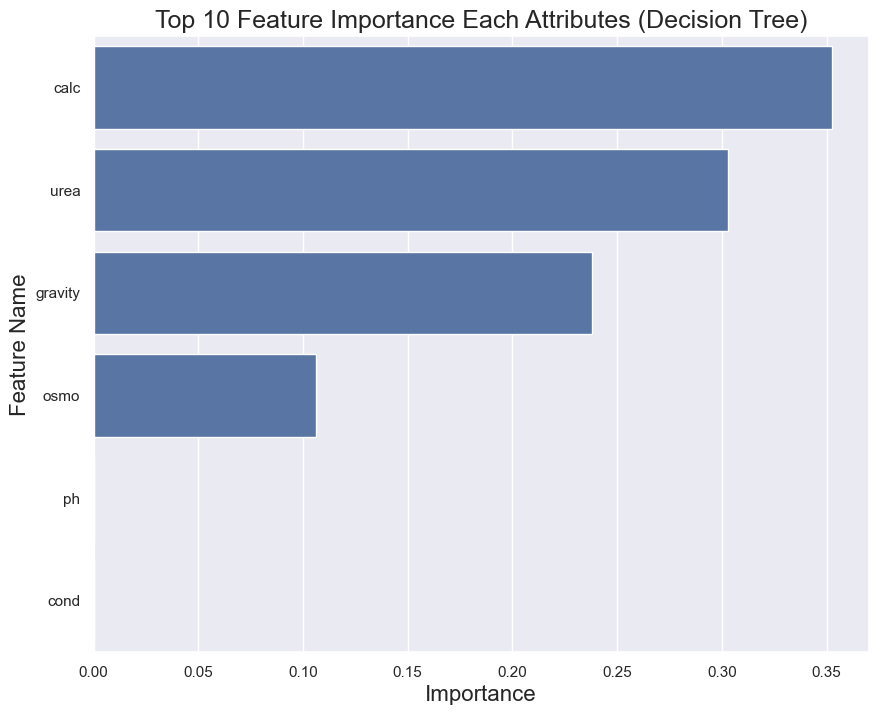

In [32]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6666666666666666')

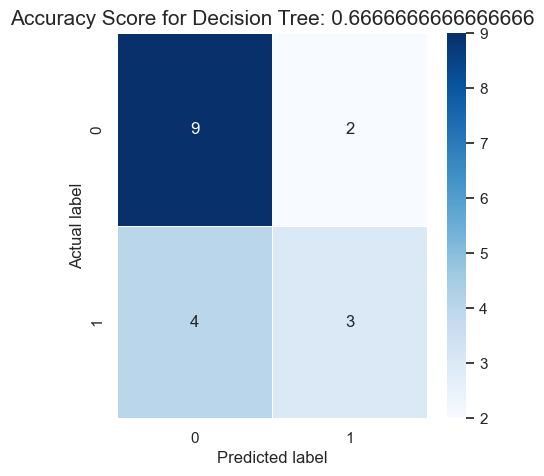

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

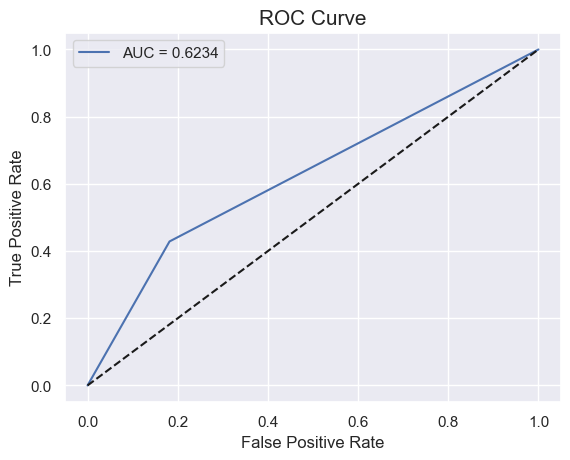

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# 2. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100}


In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(X_test)

In [43]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[10  1]
 [ 2  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.83      0.71      0.77         7

    accuracy                           0.83        18
   macro avg       0.83      0.81      0.82        18
weighted avg       0.83      0.83      0.83        18



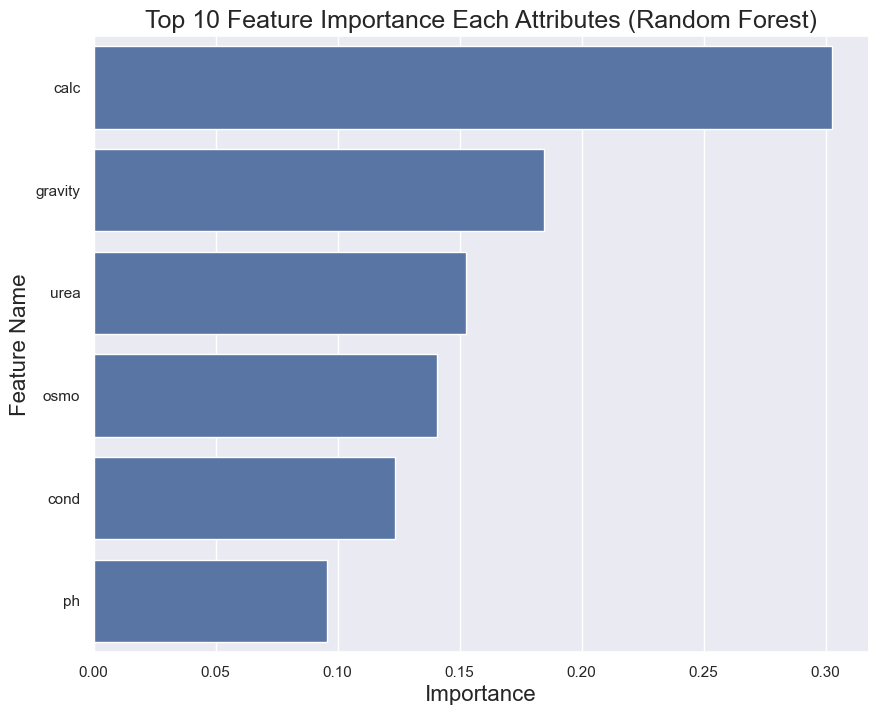

In [45]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8333333333333334')

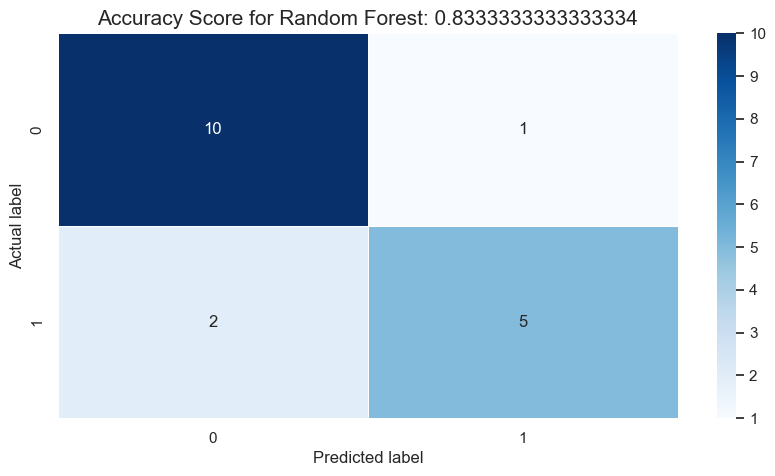

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

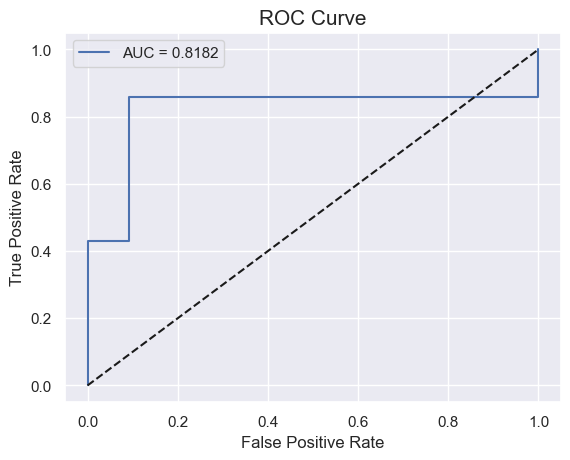

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# 3. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression model
logreg = LogisticRegression(solver='liblinear', max_iter=10000)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 0.1, 'penalty': 'l1'}


In [50]:
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression(solver='liblinear', max_iter=10000, C=0.1, penalty='l1')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[8 3]
 [3 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.57      0.57      0.57         7

    accuracy                           0.67        18
   macro avg       0.65      0.65      0.65        18
weighted avg       0.67      0.67      0.67        18



Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.6666666666666666')

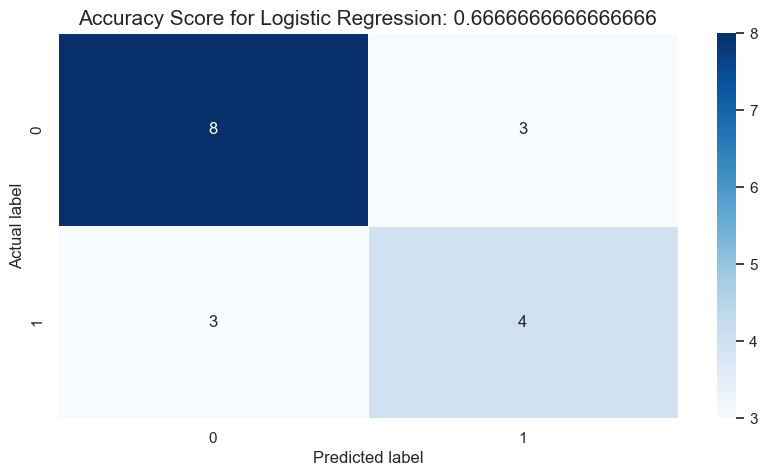

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

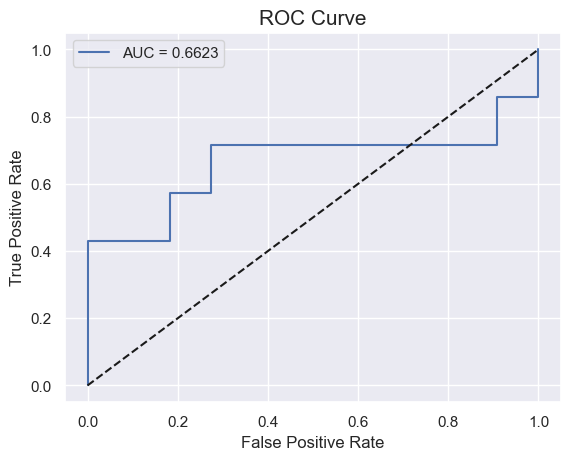

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = logreg.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# conclusion
## high accuracy and high AUC value in 